In [1]:
import pypsa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import networkx as nx
import import_ipynb
import cartopy.crs as ccrs

from shapely.geometry import Polygon

In [2]:
network = pypsa.Network()

In [3]:
# add buses

substations = pd.read_csv(r'database/west_kalimantan/buses_kalimantan.csv', delimiter = ",")

pypsa.io.import_components_from_dataframe(network, substations, "Bus")

network.buses

,name,type,x,y,v_nom,carrier,location,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,,,
0,GI_Sambas,substation,109.2688,1.3429,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,
1,GI_Singkawang,substation,108.9876,0.9266,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,
2,GI_PLTU_3_Kalbar,substation,108.8747,0.8361,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,
3,GI_PLTU_2_Kalbar,substation,108.8653,0.8300,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,
4,GI_Senggiring,substation,108.9853,0.3162,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,
5,GI_Parit_Baru,substation,109.2055,0.0592,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,
6,GI_Kota_Baru,substation,109.2987,-0.0754,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,
7,GI_Siantan,substation,109.3280,-0.0002,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,
8,GI_Sei_Raya,substation,109.3809,-0.0735,150.0,AC,Kalimantan Barat,None,1.0,0.0,inf,PQ,


In [4]:
# add lines

grid_lines = pd.read_csv(r'database/west_kalimantan/lines_kalimantan.csv', delimiter = ",")

pypsa.io.import_components_from_dataframe(network, grid_lines, "Line")

network.lines

,bus0,bus1,v_nom,capital_cost,length,carrier,x,subs0,subs1,type,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,0,1,150,10.0,59.200,AC,0.32,GI_Sambas,GI_Singkawang,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,150,10.0,20.829,AC,0.32,GI_Singkawang,GI_PLTU_2_Kalbar,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2,150,10.0,1.393,AC,0.32,GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,150,10.0,70.613,AC,0.32,GI_Singkawang,GI_Senggiring,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,150,10.0,42.848,AC,0.32,GI_Senggiring,GI_Parit_Baru,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,6,150,10.0,22.011,AC,0.32,GI_Parit_Baru,GI_Kota_Baru,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5,7,150,10.0,16.708,AC,0.32,GI_Parit_Baru,GI_Siantan,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,8,150,10.0,18.140,AC,0.32,GI_Siantan,GI_Sei_Raya,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7,9,150,10.0,99.173,AC,0.32,GI_Siantan,GI_Tayan,,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# set generator attributes

marginal_cost = {"Biomass": 3., 
                 "Coal": 0.13, 
                 "Gas": 0.13, 
                 "Geothermal": 0.5, 
                 "Hydro": 3.,
                 "Oil": 3., 
                 "Solar": 0., 
                 "Wind_ons": 0, 
                 "Wind_offs": 0}

capital_cost = {"Biomass": 2.5, 
                "Coal": 1.65, 
                "Gas": 0.75, 
                "Geothermal": 4.5, 
                "Hydro": 1.9,
                "Oil": 1.2, 
                "Solar": 0.95, 
                "Wind_ons": 1.88, 
                "Wind_offs": 4.}

efficiency = {"Biomass": 0.29, 
              "Coal": 0.34, 
              "Gas": 0.56, 
              "Geothermal": 1., 
              "Hydro": 0.33,
              "Oil": 0.25, 
              "Solar": 1., 
              "Wind_ons": 1., 
              "Wind_offs": 1.}

lifetime = {"Biomass": 30, 
            "Coal": 40, 
            "Gas": 30, 
            "Geothermal": 30, 
            "Hydro": 80, 
            "Oil": 25, 
            "Solar": 25, 
            "Wind_ons": 25, 
            "Wind_offs": 30}

In [6]:
# attach generators to buses

plants = pd.read_csv(r'database/west_kalimantan/generators_kalimantan.csv', delimiter = ",")

pypsa.io.import_components_from_dataframe(network, plants, "Generator")

network.generators

,bus,name,p_nom,carrier,efficiency,capital_cost,marginal_cost,build_year,lifetime,control,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
0,0,PLTD_Sambas,4.095,Oil,0.25,1.20,3.00,1977,25.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
1,1,PLTD_Area_Singkawang,0.160,Oil,0.25,1.20,3.00,2010,25.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
2,1,PLTD_Sei_Wie,18.400,Oil,0.25,1.20,3.00,1986,25.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
3,1,PLTD_Sudirman,5.585,Oil,0.25,1.20,3.00,1982,25.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
4,2,PLTU_Kalbar_1_Unit_2,125.000,Coal,0.34,1.65,0.13,2021,40.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,11,PLTD_Ngabang,1.720,Oil,0.25,1.20,3.00,2010,25.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
98,11,PLTD_Temajuk,0.750,Oil,0.25,1.20,3.00,2015,25.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
99,11,PLTMH_Merasap,1.500,Hydro,0.33,1.90,0.37,2010,80.0,PQ,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


(<matplotlib.collections.PatchCollection at 0x2834f5b85b0>,
 <matplotlib.collections.LineCollection at 0x2834f5c8df0>)

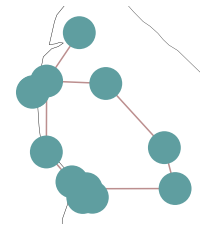

In [7]:
network.determine_network_topology()

network.plot()

In [8]:
# create time index as series

network.set_snapshots(pd.date_range("2021-01-01 00:00:00", "2021-12-31 23:00:00", freq = "H"))

print(network.snapshots)

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq='H')


In [9]:
with open('database/west_kalimantan/loads_kalimantan.csv', 'r', encoding='utf-8-sig') as f:
    demands = np.genfromtxt(f, dtype = float, delimiter = ",")

print(len(demands))

8760


In [10]:
demands

array([[178.290775 , 178.290775 , 178.290775 , ..., 178.290775 ,
        178.290775 , 178.290775 ],
       [172.2071   , 172.2071   , 172.2071   , ..., 172.2071   ,
        172.2071   , 172.2071   ],
       [166.5662917, 166.5662917, 166.5662917, ..., 166.5662917,
        166.5662917, 166.5662917],
       ...,
       [192.43835  , 192.43835  , 192.43835  , ..., 192.43835  ,
        192.43835  , 192.43835  ],
       [184.1009083, 184.1009083, 184.1009083, ..., 184.1009083,
        184.1009083, 184.1009083],
       [179.0072917, 179.0072917, 179.0072917, ..., 179.0072917,
        179.0072917, 179.0072917]])

In [36]:
load = pd.DataFrame(demands, index = network.snapshots, columns = network.buses.index)

In [37]:
load

Bus,0,1,2,3,4,5,6,7,8,9,10,11
snapshot,,,,,,,,,,,,
2021-01-01 00:00:00,178.290775,178.290775,178.290775,178.290775,178.290775,178.290775,178.290775,178.290775,178.290775,178.290775,178.290775,178.290775
2021-01-01 01:00:00,172.207100,172.207100,172.207100,172.207100,172.207100,172.207100,172.207100,172.207100,172.207100,172.207100,172.207100,172.207100
2021-01-01 02:00:00,166.566292,166.566292,166.566292,166.566292,166.566292,166.566292,166.566292,166.566292,166.566292,166.566292,166.566292,166.566292
2021-01-01 03:00:00,161.329350,161.329350,161.329350,161.329350,161.329350,161.329350,161.329350,161.329350,161.329350,161.329350,161.329350,161.329350
2021-01-01 04:00:00,156.652492,156.652492,156.652492,156.652492,156.652492,156.652492,156.652492,156.652492,156.652492,156.652492,156.652492,156.652492
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,192.790108,192.790108,192.790108,192.790108,192.790108,192.790108,192.790108,192.790108,192.790108,192.790108,192.790108,192.790108
2021-12-31 20:00:00,196.893667,196.893667,196.893667,196.893667,196.893667,196.893667,196.893667,196.893667,196.893667,196.893667,196.893667,196.893667
2021-12-31 21:00:00,192.438350,192.438350,192.438350,192.438350,192.438350,192.438350,192.438350,192.438350,192.438350,192.438350,192.438350,192.438350


In [13]:
buses = network.buses.index

buses

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object', name='Bus')

In [47]:
load_check = pd.Series(data = demands)

load_check

ValueError: Data must be 1-dimensional

In [42]:
print(len(load_check))

12


In [41]:
for bus in buses:
    network.add("Load",bus,bus=bus,
                p_set = load_check)


KeyError: 0

In [40]:
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
0,0,,,0.0,0.0,-1.0
1,1,,,0.0,0.0,-1.0
2,2,,,0.0,0.0,-1.0
3,3,,,0.0,0.0,-1.0
4,4,,,0.0,0.0,-1.0
5,5,,,0.0,0.0,-1.0
6,6,,,0.0,0.0,-1.0
7,7,,,0.0,0.0,-1.0
8,8,,,0.0,0.0,-1.0


In [ ]:
network.loads.p_set